<a href="https://colab.research.google.com/github/20104042NguyenThiTraMi/study-AI/blob/main/ND_GAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/nhan dien gao

/content/drive/.shortcut-targets-by-id/1RhyDbz8sumcr_A27lkVwoL4keJgaMkNr/Colab Notebooks/BT/nhan dien gao


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/nhan dien gao/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 354 images belonging to 18 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/nhan dien gao/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 190 images belonging to 18 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_set.class_indices

{'gao 4900': 0,
 'gao 504': 1,
 'gao 5451': 2,
 'gao 6976': 3,
 'gao ST21': 4,
 'gao ST25': 5,
 'gao bac huong': 6,
 'gao den': 7,
 'gao ham chau': 8,
 'gao lut': 9,
 'gao nang hoa': 10,
 'gao nang sen': 11,
 'gao nep': 12,
 'gao tai nguyen': 13,
 'gao thom': 14,
 'gao thom lai': 15,
 'gao tim than': 16,
 'gao vang': 17}

In [ ]:
test_set.class_indices

{'gao 4900': 0,
 'gao 504': 1,
 'gao 5451': 2,
 'gao 6976': 3,
 'gao ST21': 4,
 'gao ST25': 5,
 'gao bac huong': 6,
 'gao den': 7,
 'gao ham chau': 8,
 'gao lut': 9,
 'gao nang hoa': 10,
 'gao nang sen': 11,
 'gao nep': 12,
 'gao tai nguyen': 13,
 'gao thom': 14,
 'gao thom lai': 15,
 'gao tim than': 16,
 'gao vang': 17}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(18,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
12/12 [==============================] - 340s 30s/step - loss: 7.9450 - accuracy: 0.0565 - val_loss: 2.8682 - val_accuracy: 0.1000
Epoch 2/100
12/12 [==============================] - 17s 1s/step - loss: 2.8549 - accuracy: 0.1045 - val_loss: 2.8419 - val_accuracy: 0.0842
Epoch 3/100
12/12 [==============================] - 17s 1s/step - loss: 2.7393 - accuracy: 0.1243 - val_loss: 2.6313 - val_accuracy: 0.1632
Epoch 4/100
12/12 [==============================] - 17s 1s/step - loss: 2.4728 - accuracy: 0.2090 - val_loss: 2.3684 - val_accuracy: 0.2526
Epoch 5/100
12/12 [==============================] - 17s 1s/step - loss: 2.4062 - accuracy: 0.2599 - val_loss: 2.5551 - val_accuracy: 0.2263
Epoch 6/100
12/12 [==============================] - 18s 2s/step - loss: 2.3948 - accuracy: 0.2514 - val_loss: 2.1881 - val_accuracy: 0.3211
Epoch 7/100
12/12 [==============================] - 16s 1s/step - loss: 2.1732 - accuracy: 0.3305 - val_loss: 1.9169 - val_accuracy: 0.3632
Epoch 8/100

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/Rice/Nhan_dang_gao.h5')

In [ ]:
model_gao = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/Rice/Nhan_dang_gao.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.1325269192457199
Train Accuracy 0.9519773721694946


1/1 [==============================] - 1s 743ms/step
Gao 504


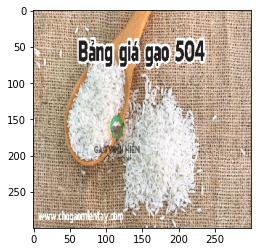

1/1 [==============================] - 0s 24ms/step
Gao 504


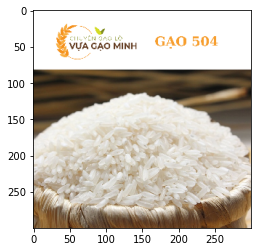

1/1 [==============================] - 0s 28ms/step
Gao nang sen


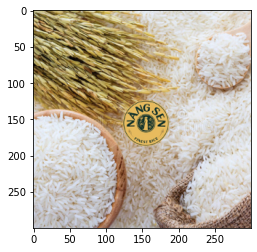

1/1 [==============================] - 0s 42ms/step
Gao nang hoa


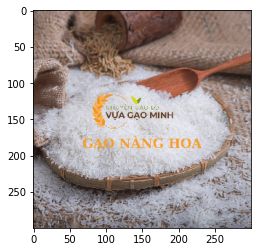

1/1 [==============================] - 0s 31ms/step
Gao ST21


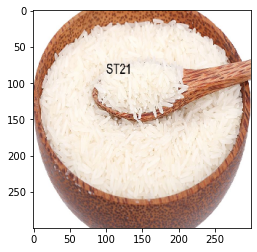

1/1 [==============================] - 0s 24ms/step
Gao 504


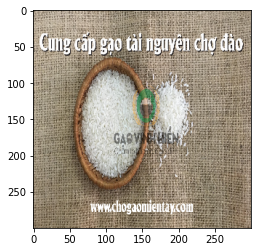

1/1 [==============================] - 0s 28ms/step
Gao 504


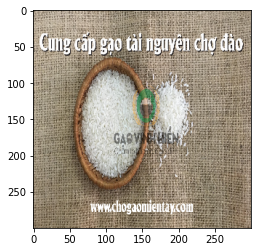

1/1 [==============================] - 0s 67ms/step
Gao nang sen


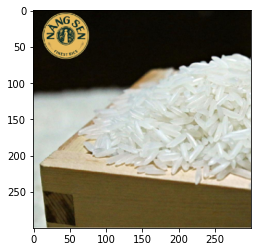

1/1 [==============================] - 0s 33ms/step
Gao thom lai


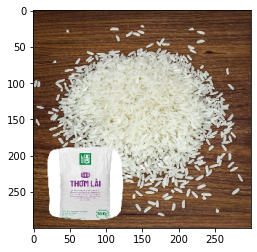

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/BT/nhan dien gao/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_gao.predict(img)
  if round(result[0][0])==1:
    prediction='Gao 4900'
  if round(result[0][1])==1:
    prediction = 'Gao 504'
  if round(result[0][2])==1:
    prediction='Gao 5451'
  if round(result[0][3])==1:
    prediction='Gao 6976'
  if round(result[0][4])==1:
    prediction = 'Gao ST21'
  if round(result[0][5])==1:
    prediction='Gao ST25'
  if round(result[0][6])==1:
    prediction='Gao bac huong'
  if round(result[0][7])==1:
    prediction = 'Gao den'
  if round(result[0][8])==1:
    prediction='Gao ham chau'
  if round(result[0][9])==1:
    prediction='Gao lut'
  if round(result[0][10])==1:
    prediction = 'Gao nang hoa'
  if round(result[0][11])==1:
    prediction='Gao nang sen'
  if round(result[0][12])==1:
    prediction='Gao nep'
  if round(result[0][13])==1:
    prediction = 'Gao tai nguyen'
  if round(result[0][14])==1:
    prediction='Gao thom'
  if round(result[0][15])==1:
    prediction='Gao thom lai'
  if round(result[0][16])==1:
    prediction = 'Gao tim than'
  if round(result[0][17])==1:
    prediction='Gao vang'
  print(prediction)
  plt.show()